In [30]:
%pip install matplotlib numpy torch torchvision tqdm
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt


mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

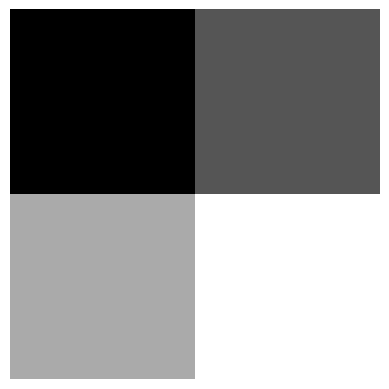

In [32]:
plt.imshow([[1, 2], [3, 4]], cmap='gray')
plt.axis('off')
plt.show()

In [33]:
x_sample, y_sample=mnist_trainset[0]

In [34]:
y_sample

5

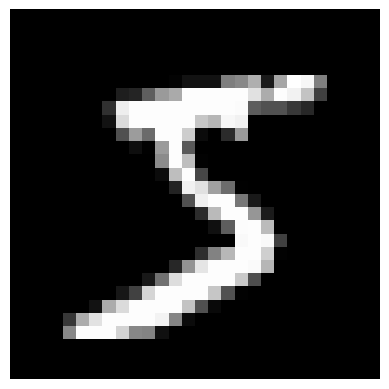

In [35]:
plt.imshow(x_sample, cmap='gray')
plt.axis('off')
plt.show()

In [36]:
torch.tensor(list(x_sample.getdata()), dtype=torch.float32)

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

# Schritte
- Dataset bauen
- Modell bauen
- Loss-Funktion, Optimizer
 -Trainingsschleife

In [37]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, ds):
        self.ds=ds  

    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        # self.ds ist ein Dataset besteht aus Tupeln (x, y) wobei x jeweils ein PIL-Image ist
        x, y=self.ds[idx]
        y=torch.tensor(y)


        # get values of pil image x
        x=torch.tensor(list(x.getdata()), dtype=torch.float32)

        # Ziel: x: als Tensor mit 784 Elementen, y: als Tensor mit 1 Element
        return x, y
    
# dataset_sample=MyDataset(mnist_trainset)
# x, y=dataset_sample[0]
# print("x.shape:", x.shape)          # torch.Size([784])
# print("y:", y)                      # tensor(5)

# image=x.reshape(28, 28)
# plt.imshow(image, cmap='gray')
# plt.axis('off')
# plt.show()

Epoch 1/15 | Loss: 0.3647
Epoch 2/15 | Loss: 0.4184
Epoch 3/15 | Loss: 0.1707
Epoch 4/15 | Loss: 0.0918
Epoch 5/15 | Loss: 0.0877
Epoch 6/15 | Loss: 0.1438
Epoch 7/15 | Loss: 0.1425
Epoch 8/15 | Loss: 0.1116
Epoch 9/15 | Loss: 0.0893
Epoch 10/15 | Loss: 0.1133
Epoch 11/15 | Loss: 0.1212
Epoch 12/15 | Loss: 0.0803
Epoch 13/15 | Loss: 0.0786
Epoch 14/15 | Loss: 0.0276
Epoch 15/15 | Loss: 0.0551


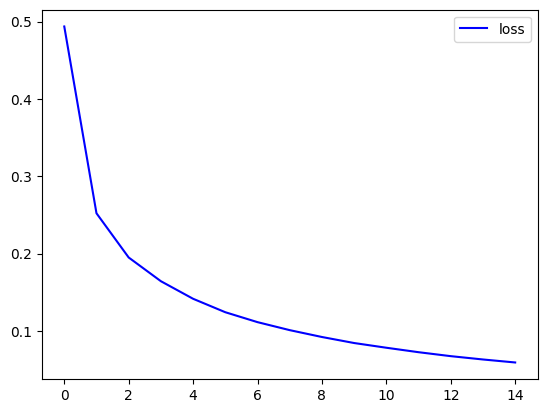

In [38]:
# 1. Schritt: Modell definieren
class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1=torch.nn.Linear(784, 128)
        self.l2=torch.nn.Linear(128, 10)     # Fully-Connected-Layer mit 10 Eingangsneuronen und 1 Ausgangsneuronen
        self.batch_norm = torch.nn.BatchNorm1d(128)  # Batch-Normalization-Layer mit 128 Neuronen
        self.relu=torch.nn.ReLU()   # ReLU-Aktivierungsfunktion
    
    def forward(self, xb):
        xb = self.relu(self.l1(xb))   # a2
        xb = self.batch_norm(xb)  # a2_norm=a2-mean/std
        xb = self.l2(xb)
        return xb

# 2. Schritt: Modell instanziieren

model=MyModel()

# 3. Schritt: Optimierer definieren
optimizer=torch.optim.SGD(model.parameters(), lr=0.01)

# 4. Schritt: X und y in DataLoader verpacken
data = MyDataset(mnist_trainset)

data_loader = torch.utils.data.DataLoader(data, batch_size=128, shuffle=True)


# 5. Schritt: Loss-Funktion definieren
loss_func=torch.nn.CrossEntropyLoss()

# 6. Schritt: Training
n_epochs=15
losses=[]
for epoch in range(n_epochs):
    losses_in_epoch=[]

    for x, y in data_loader:
        y_hat=model(x)
        loss=loss_func(y_hat, y)
        losses_in_epoch.append(loss.item())
        loss.backward()
        with torch.no_grad():
            optimizer.step()
            optimizer.zero_grad()
    losses.append(sum(losses_in_epoch)/len(losses_in_epoch))
    print(f"Epoch {epoch+1}/{n_epochs} | Loss: {loss.item():.4f}")

plt.plot(range(n_epochs),losses, color="blue")
plt.legend(["loss", "rmse_test"])
plt.show()

In [39]:
# 7. Schritt: Testen
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
test_data = MyDataset(mnist_testset)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

n_correct=0
n_total=0
for x, y in test_loader:
    y_hat=model(x)
    n_correct+=(y_hat.argmax(dim=1)==y).sum().item()
    n_total+=len(y)
print(f"Genauigkeit: {n_correct/n_total:.4f}")

Genauigkeit: 0.9677
